In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn import metrics
from collections import Counter
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


In [3]:
df=pd.read_csv('week3_new.csv')

In [4]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trends,Rolling Mean 14 Days,BOLU,BOLD
0,RCOM,EQ,2017-06-01,19.90,20.5,21.15,19.85,20.70,20.75,20.56,...,100392,23621882,19.82,2017,6,0.042714,Slight or No change,26.728571,41.363329,12.093814
1,RCOM,EQ,2017-06-02,20.75,20.5,21.65,20.05,20.70,20.65,20.67,...,76785,18572290,20.17,2017,6,-0.004819,Slight or No change,25.917857,40.552615,11.283099
2,RCOM,EQ,2017-06-05,20.65,21.4,21.60,20.65,20.75,20.80,20.99,...,48525,20457641,32.72,2017,6,0.007264,Slight or No change,25.110714,39.745472,10.475956
3,RCOM,EQ,2017-06-06,20.80,20.8,20.85,19.75,20.20,20.15,20.18,...,37179,8623150,19.37,2017,6,-0.031250,Slight or No change,24.267857,38.902615,9.633099
4,RCOM,EQ,2017-06-07,20.15,19.7,19.70,19.15,19.30,19.35,19.45,...,35975,11802183,26.21,2017,6,-0.039702,Slight or No change,23.432143,38.066901,8.797385


In [5]:
len=df.shape[0]
df['Call']=pd.DataFrame([np.nan] * (len))

for i in range(len):

    if(df['Close Price'].iloc[i]<df['BOLD'].iloc[i]):
        df['Call'].iloc[i]='Buy'
        
    elif(df['Close Price'].iloc[i]>df['BOLD'].iloc[i] and df['Close Price'].iloc[i]<df['Rolling Mean 14 Days'].iloc[i]):
        df['Call'].iloc[i]='Hold Buy/ Liquidate Short'
    
    elif(df['Close Price'].iloc[i]>df['Rolling Mean 14 Days'].iloc[i] and df['Close Price'].iloc[i]<df['BOLU'].iloc[i]):
        df['Call'].iloc[i]='Hold Short/ Liquidate Buy'
        
    elif(df['Close Price'].iloc[i]>df['BOLU'].iloc[i]):
        df['Call'].iloc[i]='Short'


In [6]:
df.groupby(by='Call').agg('count')

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trends,Rolling Mean 14 Days,BOLU,BOLD
Call,,,,,,,,,,,,,,,,,,,,,
Hold Buy/ Liquidate Short,317,317,317,317,317,317,317,317,317,317,...,317,317,317,317,317,317,317,317,317,317
Hold Short/ Liquidate Buy,161,161,161,161,161,161,161,161,161,161,...,161,161,161,161,161,161,161,161,161,161
Short,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

df['Call_num']=labelencoder.fit_transform(df['Call'])
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trends,Rolling Mean 14 Days,BOLU,BOLD,Call,Call_num
0,RCOM,EQ,2017-06-01,19.90,20.50,21.15,19.85,20.70,20.75,20.56,...,19.82,2017,6,0.042714,Slight or No change,26.728571,41.363329,12.093814,Hold Buy/ Liquidate Short,0
1,RCOM,EQ,2017-06-02,20.75,20.50,21.65,20.05,20.70,20.65,20.67,...,20.17,2017,6,-0.004819,Slight or No change,25.917857,40.552615,11.283099,Hold Buy/ Liquidate Short,0
2,RCOM,EQ,2017-06-05,20.65,21.40,21.60,20.65,20.75,20.80,20.99,...,32.72,2017,6,0.007264,Slight or No change,25.110714,39.745472,10.475956,Hold Buy/ Liquidate Short,0
3,RCOM,EQ,2017-06-06,20.80,20.80,20.85,19.75,20.20,20.15,20.18,...,19.37,2017,6,-0.031250,Slight or No change,24.267857,38.902615,9.633099,Hold Buy/ Liquidate Short,0
4,RCOM,EQ,2017-06-07,20.15,19.70,19.70,19.15,19.30,19.35,19.45,...,26.21,2017,6,-0.039702,Slight or No change,23.432143,38.066901,8.797385,Hold Buy/ Liquidate Short,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,RCOM,EQ,2019-05-07,2.00,2.00,2.10,2.00,2.10,2.10,2.06,...,54.02,2019,5,0.050000,Slight or No change,2.178571,16.813329,-12.456186,Hold Buy/ Liquidate Short,0
477,RCOM,EQ,2019-05-08,2.10,2.10,2.20,2.10,2.20,2.20,2.18,...,54.48,2019,5,0.047619,Slight or No change,2.142857,16.777615,-12.491901,Hold Short/ Liquidate Buy,1
478,RCOM,EQ,2019-05-09,2.20,2.30,2.30,2.30,2.30,2.30,2.30,...,98.19,2019,5,0.045455,Slight or No change,2.121429,16.756186,-12.513329,Hold Short/ Liquidate Buy,1
479,RCOM,EQ,2019-05-10,2.30,2.40,2.40,2.40,2.40,2.40,2.40,...,100.00,2019,5,0.043478,Slight or No change,2.114286,16.749044,-12.520472,Hold Short/ Liquidate Buy,1


In [8]:
df_train=df[['Rolling Mean 14 Days','BOLU','BOLD','Call_num']]

In [28]:
X_train,X_test, y_train, y_test = train_test_split(df_train[['Rolling Mean 14 Days','BOLU','BOLD']], df_train['Call_num'], stratify=df_train['Call_num'], test_size=0.2)

In [81]:
# This function plots the confusion matrices given y_i, y_i_hat.

from sklearn import metrics

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    
    labels = [0,1,2]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    print('ACCURACY IS:',metrics.accuracy_score(test_y, predict_y))


In [30]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",test_df.shape)

Number of data points in train data : (384, 3)
Number of data points in test data : (97, 3)


<h2>WORST MODEL (RANDOMLY ASSIGNING CLASSES)</h2>

In [47]:
from sklearn import metrics

test_len=X_test.shape[0]
predicted_y = np.zeros((test_len,3))
for i in range(test_len):
    rand_probs = np.random.rand(1,3)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)



NameError: name 'X_test' is not defined

<h2>LOGISTIC REGRESSION WITH HYPERPARAMETER TUNING</h2>

For values of alpha =  1e-05 The log loss is: 0.6907585149141603
For values of alpha =  0.0001 The log loss is: 0.6886669037319304
For values of alpha =  0.001 The log loss is: 0.6892077316150673
For values of alpha =  0.01 The log loss is: 0.6890853275649558
For values of alpha =  0.1 The log loss is: 0.6890853179100715
For values of alpha =  1 The log loss is: 0.689085328339611
For values of alpha =  10 The log loss is: 0.6890853323479607


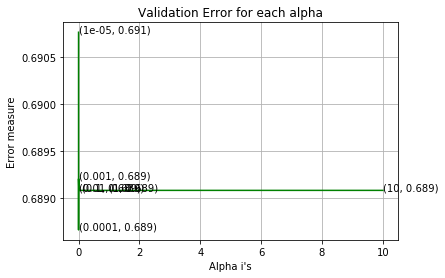

For values of best alpha =  0.0001 The train log loss is: 0.673808984186552
For values of best alpha =  0.0001 The test log loss is: 0.6886669037319304
Total number of data points : 97
-------------------- Confusion matrix --------------------


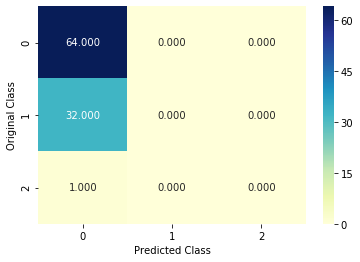

-------------------- Precision matrix (Columm Sum=1) --------------------


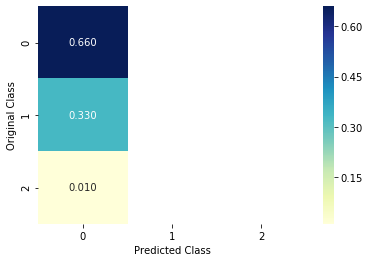

-------------------- Recall matrix (Row sum=1) --------------------


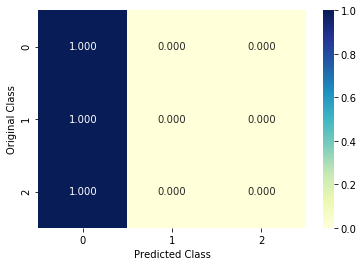

ACCURACY IS: 0.6597938144329897


In [84]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :",test_len)
plot_confusion_matrix(y_test, predicted_y)

<h2>LINEAR SVM WITH HYPERPARAMETER TUNING</h2>

For values of alpha =  1e-05 The log loss is: 0.6886387100293744
For values of alpha =  0.0001 The log loss is: 0.690675200449095
For values of alpha =  0.001 The log loss is: 0.6875392227534709
For values of alpha =  0.01 The log loss is: 0.6882148604334177
For values of alpha =  0.1 The log loss is: 0.6906711240838618
For values of alpha =  1 The log loss is: 0.6886862355283155
For values of alpha =  10 The log loss is: 0.687848603411755


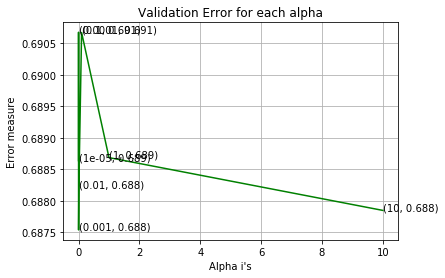

For values of best alpha =  0.001 The train log loss is: 0.6749792625276426
For values of best alpha =  0.001 The test log loss is: 0.6875392227534709
Total number of data points : 97
-------------------- Confusion matrix --------------------


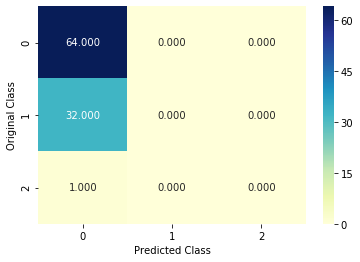

-------------------- Precision matrix (Columm Sum=1) --------------------


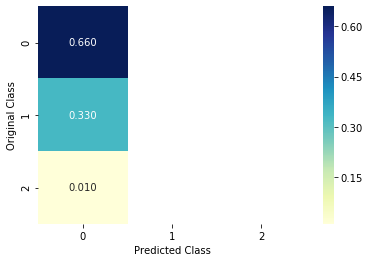

-------------------- Recall matrix (Row sum=1) --------------------


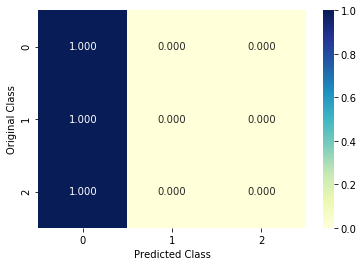

ACCURACY IS: 0.6597938144329897


In [85]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(class_weight='balanced',alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", test_len)
plot_confusion_matrix(y_test, predicted_y)

<h2>KNN Neighbours with hyperparameter tuning</h2>

for alpha = 2
For values of alpha =  2 The log loss is: 0.6880852626038637
for alpha = 3
For values of alpha =  3 The log loss is: 0.6953075939741522
for alpha = 5
For values of alpha =  5 The log loss is: 0.6897100125915595
for alpha = 11
For values of alpha =  11 The log loss is: 0.6962223971415802
for alpha = 15
For values of alpha =  15 The log loss is: 0.6883684116417634
for alpha = 21
For values of alpha =  21 The log loss is: 0.6821734743861895
for alpha = 31
For values of alpha =  31 The log loss is: 0.6883598996839243
for alpha = 41
For values of alpha =  41 The log loss is: 0.6894609033996217
for alpha = 51
For values of alpha =  51 The log loss is: 0.6879548018563331
for alpha = 99
For values of alpha =  99 The log loss is: 0.6831635866269039


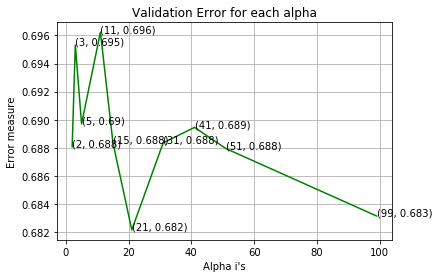

For values of best alpha =  21 The train log loss is: 0.6605918528178708
For values of best alpha =  21 The test log loss is: 0.6821734743861895
Total number of data points : 97
-------------------- Confusion matrix --------------------


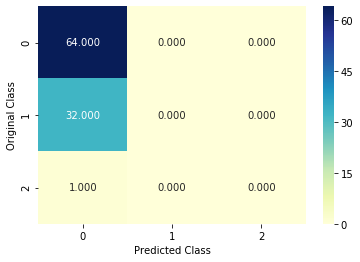

-------------------- Precision matrix (Columm Sum=1) --------------------


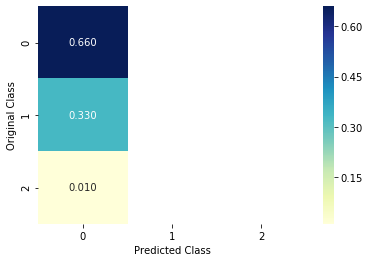

-------------------- Recall matrix (Row sum=1) --------------------


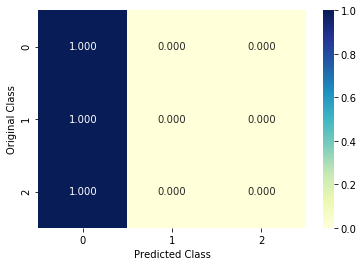

ACCURACY IS: 0.6597938144329897


In [86]:
alpha = [2,3,5, 11, 15, 21, 31, 41, 51, 99]

log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

    
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", test_len)
plot_confusion_matrix(y_test, predicted_y)


In [58]:
df_tcs=pd.read_csv('Large_Cap/TCS.csv')
df_tcs

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31
494,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83
495,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27
496,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81


In [59]:
df_roll_avg=df_tcs['Close Price'].rolling(14).mean()
df_std=df_tcs['Close Price'].std()
df_upper=df_roll_avg+(2*df_std)
df_lower=df_roll_avg-(2*df_std)

df_tcs['Rolling Mean 14 Days']=df_roll_avg
df_tcs['BOLU']=df_upper
df_tcs['BOLD']=df_lower
df_tcs=df_tcs.dropna()
df_tcs.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Rolling Mean 14 Days,BOLU,BOLD
13,TCS,EQ,01-Jun-2017,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,540032,1.378618e+09,38315,370004,68.52,2523.725000,3449.933429,1597.516571
14,TCS,EQ,02-Jun-2017,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,677824,1.741220e+09,43736,511928,75.53,2537.996429,3464.204857,1611.788000
15,TCS,EQ,05-Jun-2017,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,750094,1.933140e+09,39041,490594,65.40,2550.482143,3476.690571,1624.273714
16,TCS,EQ,06-Jun-2017,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,2973360,8.007781e+09,132494,1888281,63.51,2567.671429,3493.879857,1641.463000
17,TCS,EQ,07-Jun-2017,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,2463888,6.467589e+09,109104,1265805,51.37,2573.317857,3499.526286,1647.109429


In [60]:
len=df_tcs.shape[0]
df_tcs['Call']=pd.DataFrame([np.nan] * (len))

for i in range(len):

    if(df_tcs['Close Price'].iloc[i]<df_tcs['BOLD'].iloc[i]):
        df_tcs['Call'].iloc[i]='Buy'
        
    elif(df_tcs['Close Price'].iloc[i]>df_tcs['BOLD'].iloc[i] and df_tcs['Close Price'].iloc[i]<df_tcs['Rolling Mean 14 Days'].iloc[i]):
        df_tcs['Call'].iloc[i]='Hold Buy/ Liquidate Short'
    
    elif(df_tcs['Close Price'].iloc[i]>df_tcs['Rolling Mean 14 Days'].iloc[i] and df_tcs['Close Price'].iloc[i]<df_tcs['BOLU'].iloc[i]):
        df_tcs['Call'].iloc[i]='Hold Short/ Liquidate Buy'
        
    elif(df_tcs['Close Price'].iloc[i]>df_tcs['BOLU'].iloc[i]):
        df_tcs['Call'].iloc[i]='Short'


In [63]:
df_tcs.groupby(by='Call').agg('count')


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Rolling Mean 14 Days,BOLU,BOLD
Call,,,,,,,,,,,,,,,,,,
Buy,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Hold Buy/ Liquidate Short,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192
Hold Short/ Liquidate Buy,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287


In [75]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

df_tcs['Call']=labelencoder.fit_transform(df_tcs['Call'])
df_tcs

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Rolling Mean 14 Days,BOLU,BOLD,Call
13,TCS,EQ,01-Jun-2017,2546.60,2530.00,2564.00,2530.00,2553.00,2553.60,2552.85,540032,1.378618e+09,38315,370004,68.52,2523.725000,3449.933429,1597.516571,2
14,TCS,EQ,02-Jun-2017,2553.60,2556.25,2591.85,2552.50,2560.00,2564.90,2568.84,677824,1.741220e+09,43736,511928,75.53,2537.996429,3464.204857,1611.788000,2
15,TCS,EQ,05-Jun-2017,2564.90,2565.00,2619.90,2560.15,2616.00,2603.95,2577.20,750094,1.933140e+09,39041,490594,65.40,2550.482143,3476.690571,1624.273714,2
16,TCS,EQ,06-Jun-2017,2603.95,2631.00,2708.95,2630.00,2705.00,2696.00,2693.18,2973360,8.007781e+09,132494,1888281,63.51,2567.671429,3493.879857,1641.463000,2
17,TCS,EQ,07-Jun-2017,2696.00,2697.00,2700.00,2576.55,2613.95,2615.25,2624.95,2463888,6.467589e+09,109104,1265805,51.37,2573.317857,3499.526286,1647.109429,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31,2161.478571,3087.687000,1235.270143,1
494,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83,2171.360714,3097.569143,1245.152286,1
495,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27,2175.592857,3101.801286,1249.384429,1
496,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81,2175.878571,3102.087000,1249.670143,1


In [76]:
X_train_tcs,X_test_tcs, y_train_tcs, y_test_tcs = train_test_split(df_tcs[['Rolling Mean 14 Days','BOLU','BOLD']], df_tcs['Call'], stratify=df_tcs['Call'], test_size=0.2)

<h2>LOGISTIC REGRESSION ON TCS</h2>

For values of best alpha =  21 The train log loss is: 2.929263581536729
For values of best alpha =  21 The test log loss is: 2.953639696211593
Total number of data points : 97
-------------------- Confusion matrix --------------------


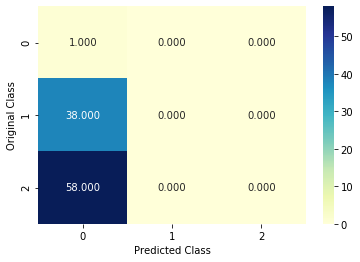

-------------------- Precision matrix (Columm Sum=1) --------------------


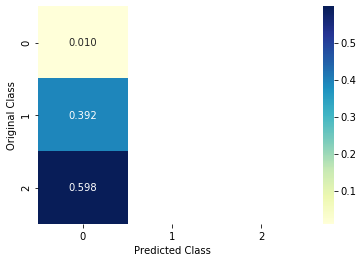

-------------------- Recall matrix (Row sum=1) --------------------


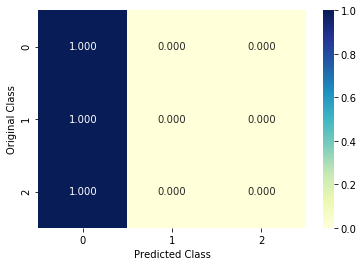

ACCURACY IS: 0.010309278350515464


In [87]:
test_len_tcs=X_test_tcs.shape[0]

predict_y_tcs = sig_clf.predict_proba(X_train_tcs)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tcs, predict_y_tcs, labels=clf.classes_, eps=1e-15))
predict_y_tcs = sig_clf.predict_proba(X_test_tcs)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tcs, predict_y_tcs, labels=clf.classes_, eps=1e-15))
predicted_y_tcs =np.argmax(predict_y_tcs,axis=1)
print("Total number of data points :",test_len_tcs)
plot_confusion_matrix(y_test_tcs, predicted_y_tcs)

<h2>ALL THE MODELS HAVE THE SAME ACCURACY, AS THE AMOUNT OF DATA IS INSUFFICIENT</h2>
<h2>EVEN AFTER CLASS BALANCING THE CLASS PREDICTED IS ALWAYS THE FIRST ONE AND THUS THIS MODEL SHOULD NOT BE USED </h2>

In [36]:
df=pd.read_csv('RCOM.csv')
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RCOM,EQ,15-May-2017,32.45,32.50,32.60,31.70,32.00,32.00,31.99,7126316,2.279973e+08,11883,1908042,26.77
1,RCOM,EQ,16-May-2017,32.00,32.05,32.35,31.85,32.00,32.10,32.12,7274881,2.336877e+08,9976,2211910,30.40
2,RCOM,EQ,17-May-2017,32.10,32.10,32.30,31.70,31.90,31.95,31.97,6245114,1.996360e+08,8838,1399815,22.41
3,RCOM,EQ,18-May-2017,31.95,31.60,31.90,31.00,31.05,31.05,31.34,11189938,3.506776e+08,17051,3629175,32.43
4,RCOM,EQ,19-May-2017,31.05,31.20,31.45,30.25,30.55,30.55,30.80,11898780,3.664547e+08,18065,3309529,27.81


In [37]:
df=df[['Open Price','Close Price','Low Price','High Price']]
df.head()

,Open Price,Close Price,Low Price,High Price
0,32.50,32.00,31.70,32.60
1,32.05,32.10,31.85,32.35
2,32.10,31.95,31.70,32.30
3,31.60,31.05,31.00,31.90
4,31.20,30.55,30.25,31.45


In [38]:
df['OC'] = df[['Open Price', 'Close Price']].apply(lambda row: (row.iloc[1]-row.iloc[0])/row.iloc[1]*100, axis=1)
#PERCENTAGE CHANGE LOW PRICE TO HIGH
df['LH'] = df[['Low Price', 'High Price']].apply(lambda row: (row.iloc[1]-row.iloc[0])/row.iloc[1]*100, axis=1)
#DAY TO DAY CHANGE IN CLOSE PRICE
df['CP'] = df['Close Price'].pct_change()
#ROLLING MEAN OF CP - 5DAY
df['ROLL'] = df['CP'].rolling(5).mean()
#STD DEV OF CP - 5DAY
df['STD'] = df['CP'].rolling(5).std()

In [39]:
df = df.dropna()

df['ACTION'] = pd.DataFrame([np.nan] * (len(df)))
for i in range(len(df)-1):
    if(df['Close Price'].iloc[i+1]>df['Close Price'].iloc[i]):
        df['ACTION'].iloc[i]=1
    elif(df['Close Price'].iloc[i+1]<df['Close Price'].iloc[i]):
        df['ACTION'].iloc[i]=-1

In [40]:
df=df.dropna()

In [41]:
X = df[['OC', 'LH', 'ROLL', 'STD']]
Y = df['ACTION']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

## RANDOM FOREST WITH HYPERPARAMETER TUNING

In [56]:
from sklearn.calibration import CalibratedClassifierCV
estimators = [50,100,150,200,250]
max_depth = [3,5,10]
log_error_array = []
for i in estimators:
    for j in max_depth:
        clf = RandomForestClassifier(n_estimators=i, criterion='gini',max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(x_train,y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(x_train, y_train)
        sig_clf_probs = sig_clf.predict_proba(x_test)
        log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("n_estimators : {}\t max depth : {}\t LOSS : {}".format(i,j,log_loss(y_test, sig_clf_probs))) 
print(np.argmin(log_error_array))

n_estimators : 50	 max depth : 3	 LOSS : 0.6749619772192476
n_estimators : 50	 max depth : 5	 LOSS : 0.6793085494928168
n_estimators : 50	 max depth : 10	 LOSS : 0.6805541380352363
n_estimators : 100	 max depth : 3	 LOSS : 0.6746241421891093
n_estimators : 100	 max depth : 5	 LOSS : 0.6763128073896572
n_estimators : 100	 max depth : 10	 LOSS : 0.6772432184503959
n_estimators : 150	 max depth : 3	 LOSS : 0.6743835868270192
n_estimators : 150	 max depth : 5	 LOSS : 0.6766959414006124
n_estimators : 150	 max depth : 10	 LOSS : 0.6775075844232468
n_estimators : 200	 max depth : 3	 LOSS : 0.6751456823465183
n_estimators : 200	 max depth : 5	 LOSS : 0.67721158499671
n_estimators : 200	 max depth : 10	 LOSS : 0.6777103445743367
n_estimators : 250	 max depth : 3	 LOSS : 0.6749985834830861
n_estimators : 250	 max depth : 5	 LOSS : 0.676933618088826
n_estimators : 250	 max depth : 10	 LOSS : 0.6786420218476309
6


In [57]:
clf = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=3, random_state=42, n_jobs=-1)
clf.fit(x_train,y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)
predict_y = sig_clf.predict(x_test)
predict_y_proba=sig_clf.predict_proba(x_test)
print('Accuracy :{} %'.format(metrics.accuracy_score(y_test, predict_y)*100))

Accuracy :58.04195804195804 %


In [59]:
#default params
no_tuning = RandomForestClassifier()
no_tuning.fit(x_train,y_train)
no_tuning_y = no_tuning.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, no_tuning_y)*100)

Accuracy: 56.64335664335665


In [61]:
df['RETURNS'] = pd.DataFrame([np.nan])*(len(df)-1)

for i in range(len(df)-1):
    df['RETURNS'].iloc[i]=df['Close Price'].iloc[i]-df['Close Price'].iloc[i+1]

In [62]:
df['CumReturns'] = (1 + df[['CP']]).cumprod()

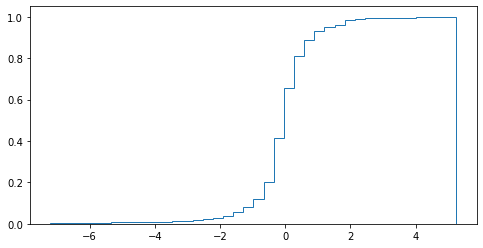

In [63]:
fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(df['RETURNS'],40, density=True,histtype='step',cumulative = True)
plt.show()